Problem: Predict release 

The owners recommend that you split the data like this to avoid the 'producer effect' by making sure no song from a given artist ends up in both the train and test set.

train: first 463,715 examples
test: last 51,630 examples
Field descriptions:

The first value is the year (target), ranging from 1922 to 2011.
Then there are 90 attributes
TimbreAverage[1-12]
TimbreCovariance[1-78]
These features were extracted from the 'timbre' features from The Echo Nest API. The authors took the average and covariance over all 'segments' and each segment was described by a 12-dimensional timbre vector.



In [18]:
463715/515345

0.8998146872483482

In [ ]:
`

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data = pd.read_csv('D://YearPredictionMSD.txt/year_prediction.csv')

In [30]:
#pd.read_csv?

In [3]:
data.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


In [4]:
data['label'].unique()

array([2001, 2007, 2008, 2002, 2004, 2003, 1999, 1992, 1997, 1987, 2000,
       2005, 1996, 1998, 2009, 2006, 1993, 1991, 1933, 1930, 1935, 1995,
       1941, 1990, 1943, 1994, 1974, 1976, 1975, 1970, 1971, 1981, 1989,
       1969, 1972, 1973, 1983, 2010, 1985, 1988, 1979, 1980, 1986, 1958,
       1978, 1968, 1962, 1967, 1982, 1984, 1961, 1966, 1964, 1960, 1965,
       1963, 1977, 1942, 1945, 1955, 1926, 1927, 1957, 1959, 1956, 1954,
       1928, 1948, 1922, 1952, 1953, 1944, 1946, 1949, 1950, 1939, 1932,
       1938, 1937, 1936, 1940, 1951, 1929, 1934, 1947, 1931, 1925, 1924,
       2011], dtype=int64)

In [5]:
data.describe()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
count,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,...,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000,515345.000000
mean,1998.397082,43.387126,1.289554,8.658347,1.164124,-6.553601,-9.521975,-2.391089,-1.793236,3.727876,...,15.755406,-73.461500,41.542422,37.934119,0.315751,17.669213,-26.315336,4.458641,20.035136,1.329105
std,10.931046,6.067558,51.580351,35.268585,16.322790,22.860785,12.857751,14.571873,7.963827,10.582861,...,32.099635,175.618889,122.228799,95.050631,16.161764,114.427905,173.977336,13.346557,185.558247,22.088576
min,1922.000000,1.749000,-337.092500,-301.005060,-154.183580,-181.953370,-81.794290,-188.214000,-72.503850,-126.479040,...,-437.722030,-4402.376440,-1810.689190,-3098.350310,-341.789120,-3168.924570,-4319.992320,-236.039260,-7458.378150,-381.424430
25%,1994.000000,39.954690,-26.059520,-11.462710,-8.487500,-20.666450,-18.440990,-10.780600,-6.468420,-2.293660,...,-1.812650,-139.555160,-20.986900,-4.669540,-6.781590,-31.580610,-101.530300,-2.566090,-59.509270,-8.820210
50%,2002.000000,44.258500,8.417850,10.476320,-0.652840,-6.007770,-11.188390,-2.046670,-1.736450,3.822310,...,9.171850,-53.090060,28.791060,33.623630,0.820840,15.598470,-21.204120,3.117640,7.759730,0.053050
75%,2006.000000,47.833890,36.124010,29.764820,8.787540,7.741870,-2.388960,6.508580,2.913450,9.961820,...,26.274480,13.478730,89.661770,77.785800,8.470990,67.794960,52.389330,9.967740,86.351610,9.679520
max,2011.000000,61.970140,384.065730,322.851430,335.771820,262.068870,166.236890,172.402680,126.741270,146.297950,...,840.973380,4469.454870,3210.701700,1734.079690,260.544900,3662.065650,2833.608950,463.419500,7393.398440,677.899630


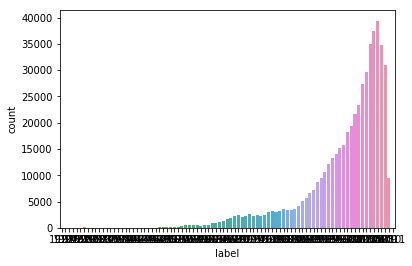

In [8]:
%matplotlib inline
sns.countplot(data['label'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
        68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84,
        85, 86, 87, 88]), <a list of 89 Text yticklabel objects>)

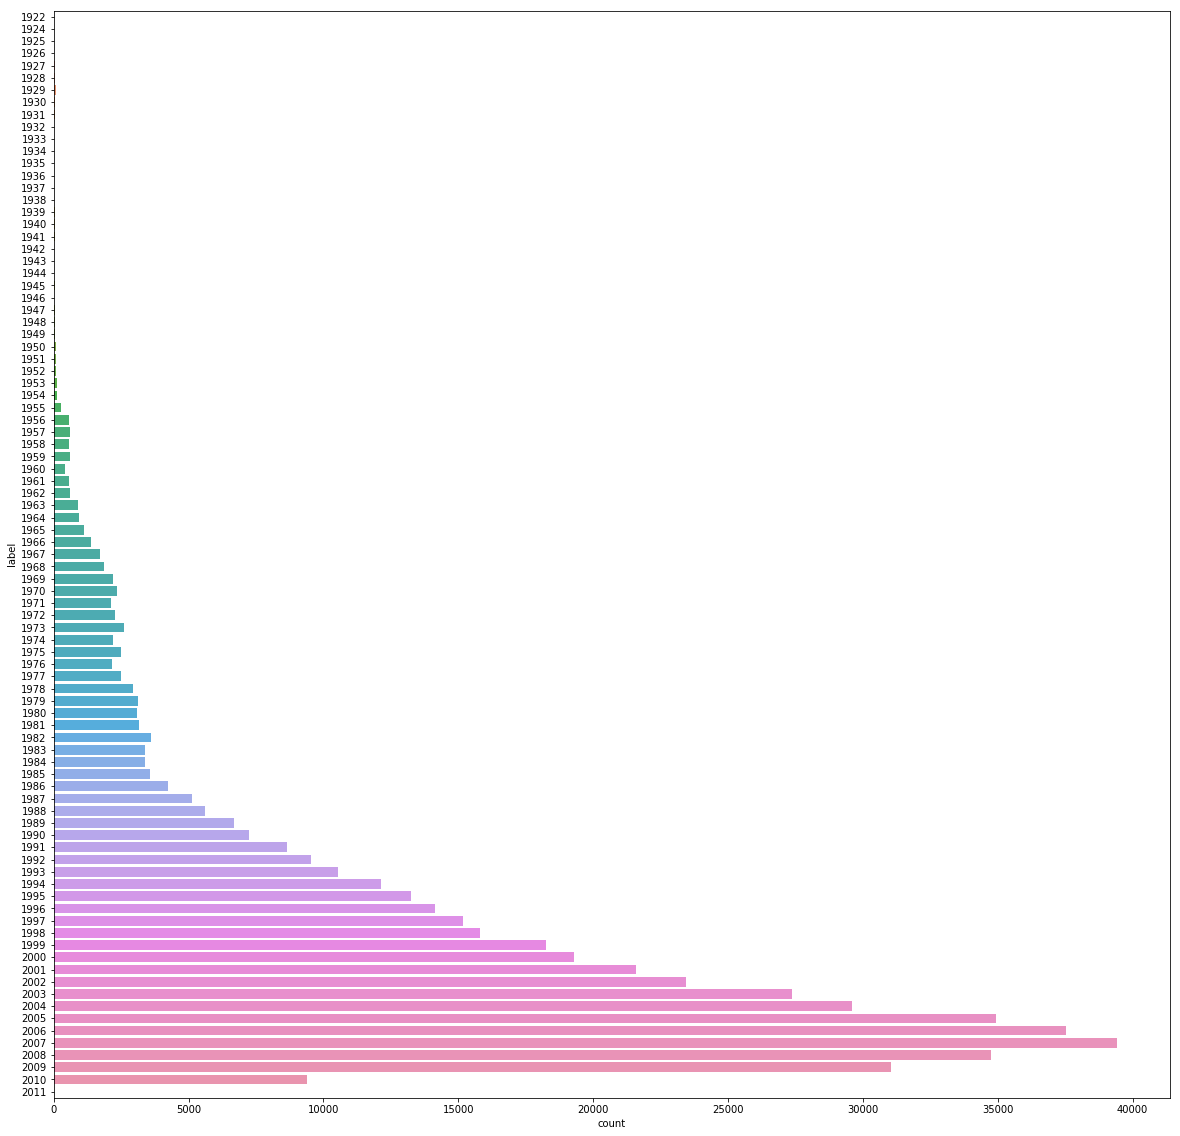

In [28]:
%matplotlib inline
plt.figure(figsize=(20,20))
sns.countplot(y=data['label'])
plt.yticks(rotation =360)

In [21]:
# scaling

In [4]:
from sklearn.preprocessing import scale

In [5]:
data.iloc[:,1:] = scale(data.iloc[:,1:])

In [25]:
data.head()

,label,TimbreAvg1,TimbreAvg2,TimbreAvg3,TimbreAvg4,TimbreAvg5,TimbreAvg6,TimbreAvg7,TimbreAvg8,TimbreAvg9,...,TimbreCovariance69,TimbreCovariance70,TimbreCovariance71,TimbreCovariance72,TimbreCovariance73,TimbreCovariance74,TimbreCovariance75,TimbreCovariance76,TimbreCovariance77,TimbreCovariance78
0,2001,1.080575,0.391265,1.826532,0.464657,-0.474730,-0.278204,-1.552371,-1.310845,0.387704,...,-0.085335,0.108508,0.142775,-0.237355,0.049233,-0.356182,0.544458,-0.470599,-0.255977,0.042292
1,2001,0.880919,0.332292,1.748539,0.721828,-0.164945,-1.191173,0.765681,0.109626,1.420941,...,-0.314250,0.306236,-0.069483,0.052017,-0.632328,-0.436057,0.556448,0.568744,0.206940,1.158587
2,2001,1.247622,0.592600,1.337173,0.750657,-0.001110,-0.702100,-0.060914,-0.069956,1.166254,...,-0.396186,0.566683,-0.756534,-0.284019,-0.024220,0.223128,-0.509789,-0.338457,0.105819,-0.090208
3,2001,0.801044,-0.061805,0.783683,0.087218,0.329180,-1.298429,0.510714,-1.073355,-0.016803,...,0.586237,-0.559427,-0.478689,-0.890161,-0.793906,0.567269,-0.263107,0.408116,0.967862,0.793384
4,2001,1.249775,0.793334,1.657037,0.447460,-0.406775,-0.567138,-0.692498,-0.952197,0.841844,...,-0.181585,0.099672,0.191319,-0.585576,-0.111877,-0.219960,0.448804,0.256882,0.192038,1.241363


In [30]:
##### i am referring kaggle kernal for ideas

In [32]:
# we can see that there is less that from 1992 to 1950 so lets remove them for now
# 

In [58]:
data_t = data[data['label'] > 1940]

In [8]:
# now lets analyze the fetures

In [9]:
# correlation

In [38]:
co = data.iloc[:,1:22].corr()

Text(0.5,1,'Correlation')

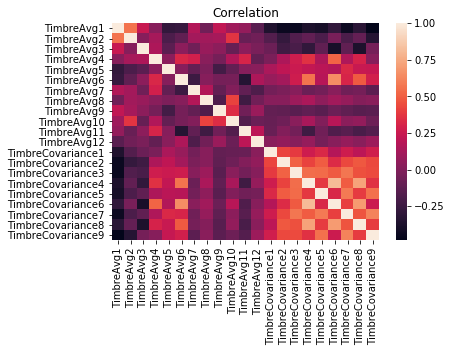

In [39]:
sns.heatmap(co)
plt.title('Correlation')

In [10]:
columns = data_t.groupby('label').mean()

In [11]:
columns.shape

(71, 90)

Text(0.5,15,'features(mean)')

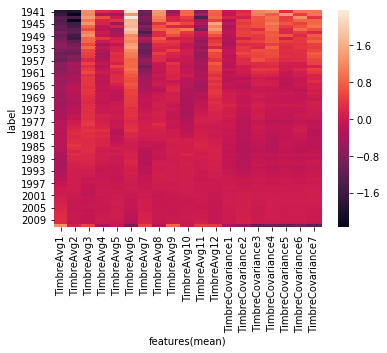

In [15]:
%matplotlib inline
sns.heatmap(columns.iloc[:,0:19])
plt.xlabel('features(mean)')

In [31]:
sns.distplot?

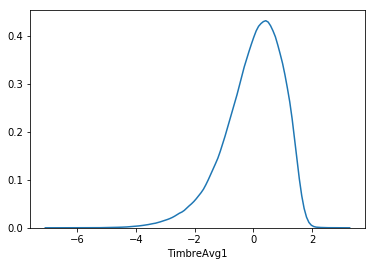

In [32]:
sns.distplot(data['TimbreAvg1'],hist=False)

C:\Users\amogh\Anaconda3\lib\site-packages\numpy\core\_methods.py:135: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\Users\amogh\Anaconda3\lib\site-packages\numpy\core\_methods.py:127: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\amogh\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:22: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)


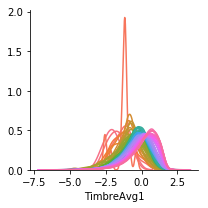

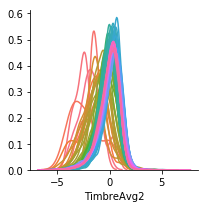

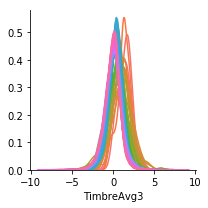

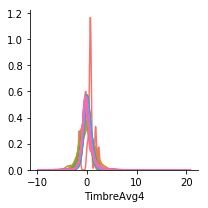

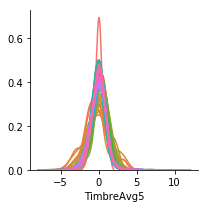

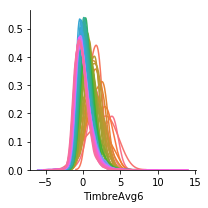

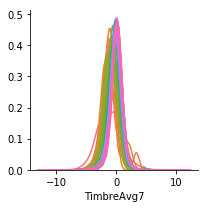

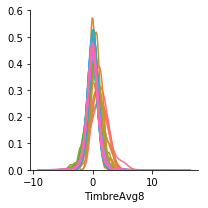

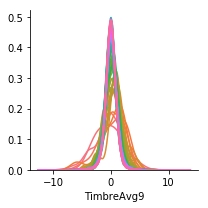

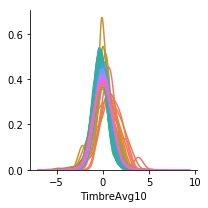

In [34]:
for component in data_t.columns[1:11]:
    sns.FacetGrid(data_t, hue="label", size=3) \
       .map(sns.kdeplot, component) 
       
    plt.show()

In [ ]:
# principle component analysis

here we find the variance between the variables and then go for correlation higher the correlation the similar the variables
eignvalues and eignvectors are formed and principle components created

In [4]:
from sklearn.decomposition import PCA

In [5]:
pca = PCA(n_components=40)

In [6]:
data_pca = pca.fit_transform(data_t.iloc[:,1:])

In [7]:
var = pca.explained_variance_ratio_

In [8]:
var1 = np.cumsum(var)

In [9]:
var1 = np.round((var1*100),4)

In [10]:
plt.plot(var1)

In [12]:
data_pca.shape

(514817, 40)

In [11]:
data_pca = pd.DataFrame(data_pca)

In [12]:
data_pca['label'] = data_t['label']

In [22]:
data_x = data_pca.iloc[0:1000,:]

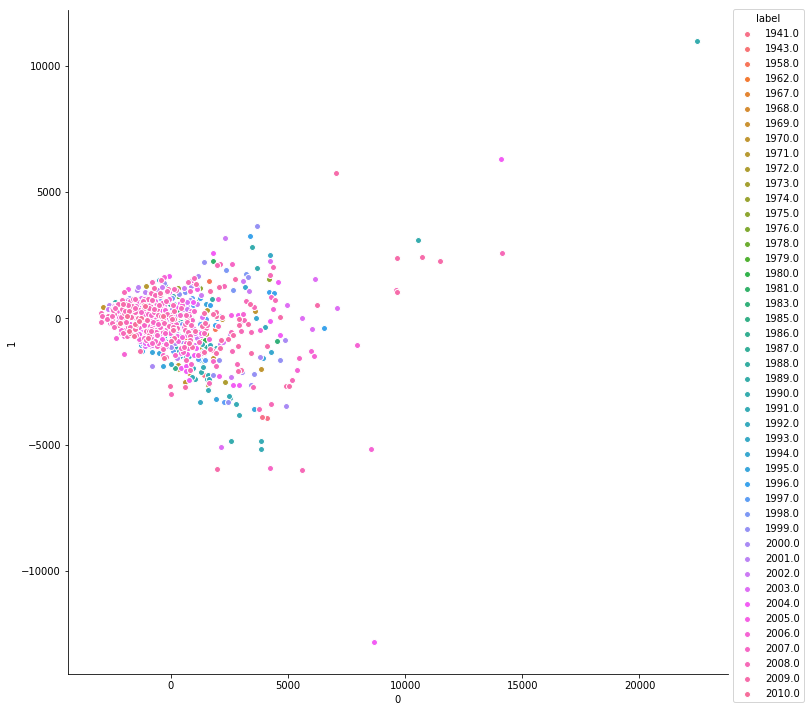

In [21]:
%matplotlib inline
sns.pairplot(data_x,x_vars=0,y_vars=1,hue='label',size=10)

In [22]:
# lests try t sne 

this reduces the higher dimentions to lower dimentions

In [16]:
from sklearn.manifold import TSNE

In [18]:
tsne = TSNE(n_components=2)

In [23]:
tsne_result = tsne.fit_transform(data_x.iloc[:,:-1])

In [27]:
tsne_result = pd.DataFrame(tsne_result)

In [32]:
tsne_result['label'] = data_x['label']

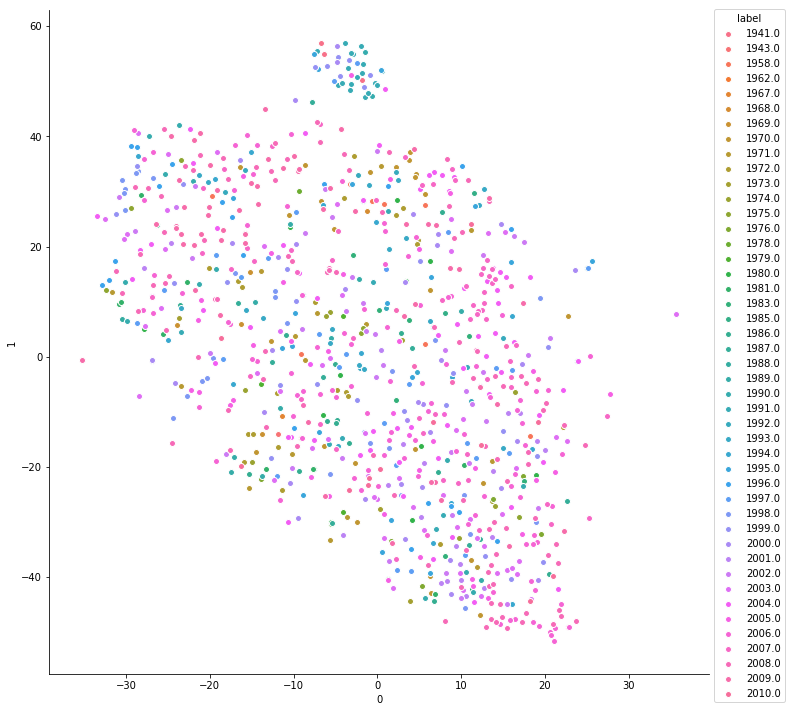

In [34]:
%matplotlib inline
sns.pairplot(tsne_result,x_vars=0,y_vars=1,hue='label',size=10)

In [ ]:
# modeling SVM

helps in finding the hyperplane 

In [6]:
from sklearn.cross_validation import train_test_split

C:\Users\amogh\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [22]:
X_train,X_test,Y_train,Y_test = train_test_split(data.iloc[:,1:],data['label'],train_size=0.89)

In [9]:
from sklearn.svm import SVC

In [10]:
svc = SVC()

In [11]:
svc.fit(X_train,Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
Y_pred = svc.predict(X_test)


In [23]:
from sklearn.metrics import classification_report

In [13]:
from sklearn.metrics import accuracy_score

In [70]:
#print(classification_report(Y_test,Y_pred))

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [25]:
r = RandomForestClassifier()

In [26]:
r.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [27]:
y= r.predict(X_test)

In [29]:
accuracy_score(Y_test,y)

0.087214225232853521